 视频网站数据清洗整理和结论研究
 
 1、数据清洗 - 去除空值
 
 2、数据清洗 - 时间标签转化
 
 3、问题1 分析出不同导演电影的好评率，并筛选出TOP20
 
 4、问题2 统计分析2001-2016年每年评影人数总量


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# 读取数据
path = r'C:\Users\HBlock\Desktop\DataFiles\爱奇艺视频数据.csv'
data = pd.read_csv(path, engine='python')
data.head(1)

,数据获取日期,演员,视频ID,详细链接,剧名,状态,类型,来源平台,整理后剧名,更新时间,...,上映年份,简介,导演,差评数,评分人数,播放量,更新至,总集数,第几季,好评数
0,2016年5月24日,NaN,100,http://www.iqiyi.com/dianshiju/douyu2.html,斗鱼Ⅱ(1-20)全集,已完结,粤语电视剧/偶像剧/言情剧/超清1080P,爱奇艺,斗鱼2,NaN,...,2004.0,在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活都有了改变。语燕为了让自己不再是于皓的包...,NaN,2034.0,32722.0,8069526.0,NaN,20.0,2,30688.0


In [63]:
'''
    1、数据清洗 - 去除空值
    提示：fillna方法填充缺失数据，注意inplace参数
'''
def data_cleaning(df):
    cols = df.columns
    test = np.nan
    for col in cols:
        if df[col].dtype == 'object':
            df[col].fillna('缺失数据',inplace = True)
        else:
            df[col].fillna(0,inplace = True)
    return df
print(data_cleaning(data).head(1))

       数据获取日期    演员 视频ID                                        详细链接  \
0  2016年5月24日  缺失数据  100  http://www.iqiyi.com/dianshiju/douyu2.html   

            剧名   状态                     类型 来源平台 整理后剧名  更新时间   ...       上映年份  \
0  斗鱼Ⅱ(1-20)全集  已完结  粤语电视剧/偶像剧/言情剧/超清1080P  爱奇艺   斗鱼2  缺失数据   ...     2004.0   

                                                  简介    导演     差评数     评分人数  \
0  在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活都有了改变。语燕为了让自己不再是于皓的包...  缺失数据  2034.0  32722.0   

         播放量  更新至   总集数  第几季      好评数  
0  8069526.0  0.0  20.0    2  30688.0  

[1 rows x 24 columns]


In [2]:
'''
    数据清洗 - 时间标签转化
    将时间字段改为时间标签
    需要将中文日期转化为非中文日期，例如 2016年5月24日 → 2016.5.24
'''
def convert_time(df,*cols):
    for col in cols:
        df[col] = df[col].str.replace('年','.')
        df[col] = df[col].str.replace('月','.')
        df[col] = df[col].str.replace('日','.')
        df[col] = pd.to_datetime(df[col])
    return df
convert_time(data,'数据获取日期')

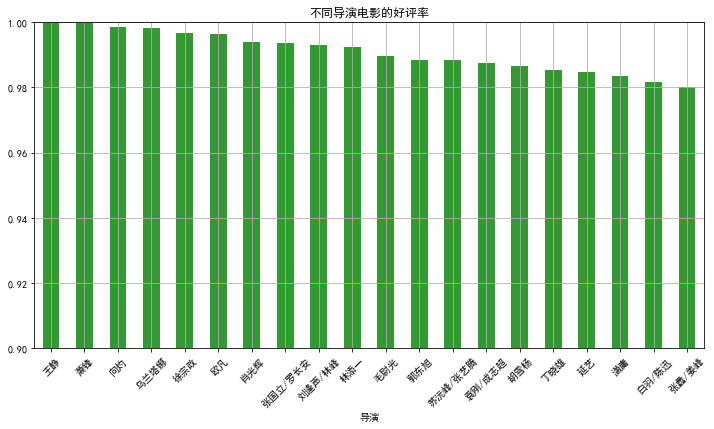

In [86]:
# 问题1 分析出不同导演电影的好评率，并筛选出TOP20
# 要求：
# ① 计算统计出不同导演的好评率，不要求创建函数
# ② 通过多系列柱状图，做图表可视化
# 提示：
# ① 好评率 = 好评数 / 评分人数
import matplotlib  as mpl  
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 以上两行解决中文标签乱码

df_product = data.groupby('导演')[['好评数','评分人数']].sum()
df_product['好评率'] = df_product['好评数']/df_product['评分人数']
df_sort = df_product.sort_values('好评率',ascending=False) # 降序排列


# 绘制柱状图  只绘制前20个
df_sort['好评率'][:20].plot(kind='bar',
                       grid=True,
                       alpha=0.8,
                       figsize=(12,6),
                       color='g',
                       rot=45,
                       ylim=[0.90,1],
                       title='不同导演电影的好评率')
plt.show()